In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

In [3]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X = data['data'][:,6]
Y = data['target']

In [5]:
print(X.shape)
print(Y.shape)

(506,)
(506,)


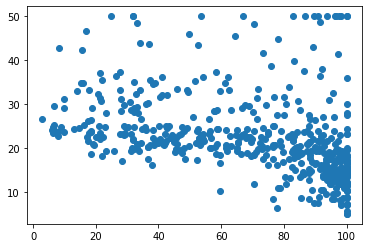

In [6]:
plt.scatter(X,Y)

In [7]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
    
    
    def forward(self,x):
        x = self.fc1(x)
        return x
    
    
model = LinearRegression()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
EPOCHS = 5000

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train).view(-1, 1), torch.Tensor(y_test).view(-1,1)

In [10]:
X_train = X_train.view(-1, 1)
X_test = X_test.view(-1, 1)

In [11]:
model.train()
losses = []
for epoch in range(EPOCHS):
    y_hat = model.forward(X_train)
    optimizer.zero_grad()
    loss = criterion(y_hat, y_train)
    assert y_hat.shape == y_train.shape
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

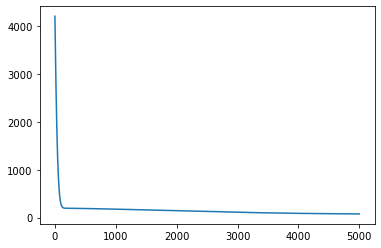

In [12]:
plt.plot(losses)

In [13]:
model.eval()
with torch.no_grad():
    y_hat = model.forward(X_test)
    print(y_hat[0].item())
    print(y_test[0].item())

20.904863357543945
21.899999618530273


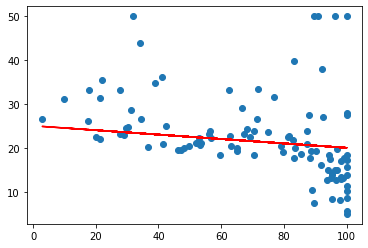

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat.detach().numpy(), color='red')
plt.show()